## 1. 프로젝트 기획



1) MySQL Workbench에서 DB 생성 후 songinformationtbl과 monthlycharttbl 생성하고 외래키로 연결하기


2) 1~50위 각 노래의 상세 정보페이지에서 노래 고유번호, 노래제목, 가수, 앨범 발매일, 장르, 댓글 수, 전날 순위 데이터를 
   스크래핑 후 pymysql을 활용하여 project2DB의 songinformationtbl에 저장하기
   
   
3) 음원 사이트의 월간 차트에서 1~50위의 순위, 가수, 앨범명, 좋아요 수, 노래 고유번호 데이터를 스크래핑 후 
   pymysql을 활용하여 project2DB의 monthlycharttbl에 저장하기


4) 전날과 오늘 순위 비교하여 그래프 그리기





####  이번 프로젝트에서 나는 노래 상세 정보페이지를 스크래핑 후 데이터베이스에 저장하는 역할을 맡았다.


## 2. 프로젝트 설명

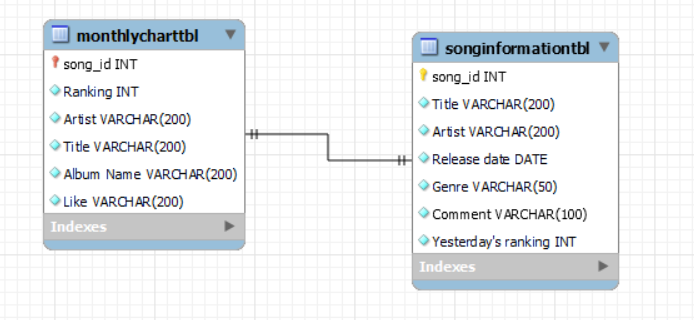

1) MySQL Workbench에서 위의 사진과 같이 두 개의 테이블을 생성 후 song_id를 외래키로 설정했다.

- songinformation 테이블이 부모 테이블이므로 데이터를 넣을 때도 부모 테이블의 데이터를 모두 넣은 후 자식 테이블의 데이터를 넣어야한다.

- 반대로 데이터를 삭제할 때는 자식 테이블의 데이터를 먼저 삭제해야 부모 테이블의 데이터도 삭제할 수 있다.

2) 곡 정보 테이블 스크래핑 후 DB 저장

- 곡 상세 정보 페이지의 url은 마지막에 해당 노래의 고유번호만 바뀌고 동일한 형식을 갖고 있었다. 
  따라서 tr태그에서 class이름이 'lst50'인 모든 태그를 가져와서 반복문을 돌리며 각자의 고유 번호를 추출했다.
 
- 이후 데이터들은 변하지 않는 값들이라 태그를 검색해서 가져올 수 있었다. 하지만 댓글 수의 경우엔 동적으로 업데이트가 되기 때문에
  selenium을 사용해야했다. 브라우저를 열지않고 가져오기 데이터를 가져오기 위해 webdriver에 있는 option을 활용했고         
  find_element_by_css_selector를 사용하여 동적인 값을 가져올 수 있었다.
  
- DB에 저장하는 부분은 값이 하나씩 들어갈 때마다 확인을 하고 싶어 출력문을 함께 지정했고 sql문이 실행할 때마다 commit시켰다.



In [5]:
import requests
import pymysql
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

option = webdriver.ChromeOptions()
option.add_argument('headless')

url = "https://www.melon.com/chart/month/index.htm"

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}

data = requests.get(url, headers=header)
soup = BeautifulSoup(data.text, "html.parser")

db = pymysql.connect(host='localhost', port=3306, user='root', passwd='1234', db='project2DB', charset='utf8')
cursor = db.cursor()

info = soup.find_all('tr', {'class': 'lst50'})
yesterday_ranking = []

for idx, song in enumerate(info):
    song_id = song['data-song-no']
    url2 = "https://www.melon.com/song/detail.htm?songId={}".format(song_id)

    data2 = requests.get(url2, headers=header)
    data2.raise_for_status()

    soup2 = BeautifulSoup(data2.text, 'lxml')

    song_detail = soup2.find('div', {'class':'section_info'})
    meta_data = song_detail.find('div', {'class':'meta'})

    song_name = song_detail.find('div', {'class':'song_name'}).get_text()[3:].strip('\n').strip()
    artist = song_detail.find('div', {'class':'artist'}).get_text().strip('\n')
    release_date = meta_data.find_all('dd')[1].get_text()
    genre = meta_data.find_all('dd')[2].get_text()
    yesterday_rank = int(song_detail.find('div', {'class':'chart'}).find('span', {'class':'num'}).get_text().strip('\n'))
    yesterday_ranking.append(int(yesterday_rank))
    browser = webdriver.Chrome("./chromedriver.exe" , options=option)
    browser.get(url2)
    comment = browser.find_element_by_css_selector  ("#revCnt").text
    
    sql = """INSERT INTO songinformationtbl VALUES(
    "{}", "{}", "{}", "{}", "{}", "{}", "{}");""".format(song_id, song_name, artist, release_date, genre, comment, yesterday_rank)
    
    print(idx+1, '.', song_name, 'DB 저장 완료')
    cursor.execute(sql)
    db.commit()
    
db.close()

1 . Butter DB 저장 완료
2 . Next Level DB 저장 완료
3 . 헤픈 우연 DB 저장 완료
4 . Dun Dun Dance DB 저장 완료
5 . Peaches (Feat. Daniel Caesar & Giveon) DB 저장 완료
6 . 롤린 (Rollin') DB 저장 완료
7 . 라일락 DB 저장 완료
8 . ASAP DB 저장 완료
9 . 운전만해 (We Ride) DB 저장 완료
10 . Celebrity DB 저장 완료
11 . Dynamite DB 저장 완료
12 . 상상더하기 DB 저장 완료
13 . 안녕 (Hello) DB 저장 완료
14 . 상상더하기 DB 저장 완료
15 . Timeless DB 저장 완료
16 . 사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco) DB 저장 완료
17 . 내 손을 잡아 DB 저장 완료
18 . 멜로디 DB 저장 완료
19 . 밝게 빛나는 별이 되어 비춰줄게 DB 저장 완료
20 . 마.피.아. In the morning DB 저장 완료
21 . Alcohol-Free DB 저장 완료
22 . 라라라 DB 저장 완료
23 . 치맛바람 (Chi Mat Ba Ram) DB 저장 완료
24 . LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지) DB 저장 완료
25 . 밤하늘의 별을(2020) DB 저장 완료
26 . 내사람 DB 저장 완료
27 . Coin DB 저장 완료
28 . Savage Love (Laxed - Siren Beat) (BTS Remix) DB 저장 완료
29 . Lovesick Girls DB 저장 완료
30 . 잠이 오질 않네요 DB 저장 완료
31 . On The Ground DB 저장 완료
32 . Dolphin DB 저장 완료
33 . 에잇(Prod.&Feat. SUGA of BTS) DB 저장 완료
34 . Blueming DB 저장 완료
35 . 취기를 빌려 (취향저격 그녀 X 산들) DB 저장 완료
36 . 

3) 월간 차트 테이블 스크래핑 후 DB 저장

- 월간 차트는 곡 정보 페이지와 달리 한 페이지에서 데이터를 가져올 수 있어서 다음과 같이 list에 저장해줬다.

- 좋아요 수는 위에서 댓글 수를 가져올 때와 같은 방법으로 데이터를 가져올 수 있었다.

- 데이터들이 1~50위까지 리스트에 저장되어 있으므로 DB에 저장할 때도 같은 인덱스를 갖는 값끼리 넣어주면 된다.

- 이때도 어느정도 진행되었는지 확인하기 위해 출력문을 넣어주었다. 

In [6]:
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='1234', db='project2DB', charset='utf8')
cursor = db.cursor()

titles = soup.find_all("div", {"class" : "ellipsis rank01"})
artists = soup.find_all("div", {"class" : "ellipsis rank02"})
albums = soup.find_all("div", {"class" : "ellipsis rank03"})
info = soup.find_all('tr', {'class': 'lst50'})

title = []
artist = []
album = []
likes = []
song_id = []

for i in titles:
    title.append(i.find('a').text)
    
for i in artists:
    artist.append(i.find('a').text)
    
for i in albums:
    album.append(i.find('a').text)

for i in info:
    song_id.append(i['data-song-no'])
    
browser = webdriver.Chrome("./chromedriver.exe" , options=option)
browser.get(url)
tmp_likes = browser.find_elements_by_css_selector("#lst50 > td:nth-child(8) > div > button > span.cnt")

for like in tmp_likes:
    likes.append(str(like.text))

for idx in range(50):
    sql = """INSERT INTO monthlycharttbl VALUES
    ("{}", "{}", "{}", "{}", "{}", "{}");""".format(song_id[idx], idx+1, artist[idx], title[idx], album[idx], likes[idx])
    
    cursor.execute(sql)  
    db.commit()
    print(idx+1, '.', title[idx], 'DB 저장 완료')
    
db.close()

1 . Butter DB 저장 완료
2 . Next Level DB 저장 완료
3 . 헤픈 우연 DB 저장 완료
4 . Dun Dun Dance DB 저장 완료
5 . Peaches (Feat. Daniel Caesar & Giveon) DB 저장 완료
6 . 롤린 (Rollin') DB 저장 완료
7 . 라일락 DB 저장 완료
8 . ASAP DB 저장 완료
9 . 운전만해 (We Ride) DB 저장 완료
10 . Celebrity DB 저장 완료
11 . Dynamite DB 저장 완료
12 . 상상더하기 DB 저장 완료
13 . 안녕 (Hello) DB 저장 완료
14 . 상상더하기 DB 저장 완료
15 . Timeless DB 저장 완료
16 . 사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco) DB 저장 완료
17 . 내 손을 잡아 DB 저장 완료
18 . 멜로디 DB 저장 완료
19 . 밝게 빛나는 별이 되어 비춰줄게 DB 저장 완료
20 . 마.피.아. In the morning DB 저장 완료
21 . Alcohol-Free DB 저장 완료
22 . 라라라 DB 저장 완료
23 . 치맛바람 (Chi Mat Ba Ram) DB 저장 완료
24 . LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지) DB 저장 완료
25 . 밤하늘의 별을(2020) DB 저장 완료
26 . 내사람 DB 저장 완료
27 . Coin DB 저장 완료
28 . Savage Love (Laxed - Siren Beat) (BTS Remix) DB 저장 완료
29 . Lovesick Girls DB 저장 완료
30 . 잠이 오질 않네요 DB 저장 완료
31 . On The Ground DB 저장 완료
32 . Dolphin DB 저장 완료
33 . 에잇(Prod.&Feat. SUGA of BTS) DB 저장 완료
34 . Blueming DB 저장 완료
35 . 취기를 빌려 (취향저격 그녀 X 산들) DB 저장 완료
36 . 

4) 전날과 오늘 순위 비교하고 그래프 그리기

- 1~10위까지의 곡 순위를 matplotlib를 활용해 그래프로 나타내보았다.

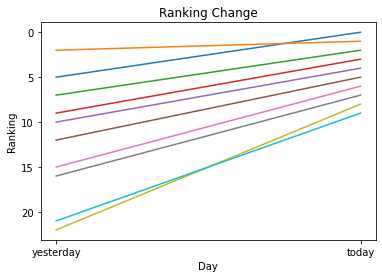

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(50)
day = ['yesterday', 'today']
rank = []

for i in range(10):
    rank.append(yesterday_ranking[i])
    rank.append(x[i])
    plt.plot(day, rank)
    rank.clear()
    
plt.gca().invert_yaxis()
plt.xlabel("Day")
plt.ylabel("Ranking")
plt.title("Ranking Change")
plt.show()

## 4. 느낀점 및 개선점

이번 프로젝트를 진행하면서 그동안 배웠던 파이썬, 웹 스크래핑, pymysql 사용 방법을 한 번 더 복습할 수 있었고 selenium에서 브라우저를 열지 않고 데이터만 가져오는 방법도 알게되었다. 또한 곡 상세 페이지를 가져올 때 반복문을 써서 여러번 가져오다보니 페이지가 막혔었는데 크롬의 확장 프로그램 중 vpn 프로그램을 설치하여 문제를 해결할 수 있었다. 

스크래핑을 할 때는 어떤 데이터를 어디에 활용할지 먼저 정하고 진행해야 하는데 이번 프로젝트에서는 수업시간에 배웠던 스크래핑과 pymysql을 활용해 보는 것에 초점을 두었다. 
현재는 2021년 6월 차트에서 1 ~ 50위 정보를 가져왔지만 좀 더 확장시켜서 더 다양한 기간의 1 ~ 100위까지 데이터를 가져와서 의미있는 분석을 해보면 좋을 것 같다.